In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
basket_df = pd.read_csv("data/company_basket.csv", sep=";")
basket_df

,basket_name,company_name,company_share
0,a123456789b123456789c123456789,Gaming Realms PLC,22.474253
1,a123456789b123456789c123456789,Intercede Group PLC,15.830177
2,a123456789b123456789c123456789,Jujubee SA,0.612906
3,a123456789b123456789c123456789,Net Insight AB,33.207190
4,a123456789b123456789c123456789,Osmozis SA,16.675088
...,...,...,...
3278,WTF II,Capitea SA,1.243451
3279,WTF II,Dolphin Drilling AS,55.178652
3280,WTF II,Energy Solar Tech SA,4.256468
3281,WTF II,Kibo Energy PLC,0.709684


In [5]:
stock_files = [
    "Sweden_20220701.txt",
    "Sweden_20230601.txt",
    "Sweden_20240601.txt",
    "Sweden_20211201.txt",
    "Sweden_20221101.txt",
    "Sweden_20231001.txt",
    "Sweden_20241001.txt",
    "Sweden_20220301.txt",
    "Sweden_20230301.txt",
    "Sweden_20240201.txt"
]

stock_dfs = []
for file in stock_files:
    stock_info = pd.read_csv(f"data/{file}", sep=";", parse_dates=["endtime"])
    stock_dfs.append(stock_info)
stocks = pd.concat(stock_dfs)

In [6]:
stocks["finparametername"].value_counts()

finparametername
Mcap            1525849
TRV             1054890
closingPrice    1038874
Ebitda           934553
Revenue          890741
Name: count, dtype: int64

Text(0, 0.5, 'Count')

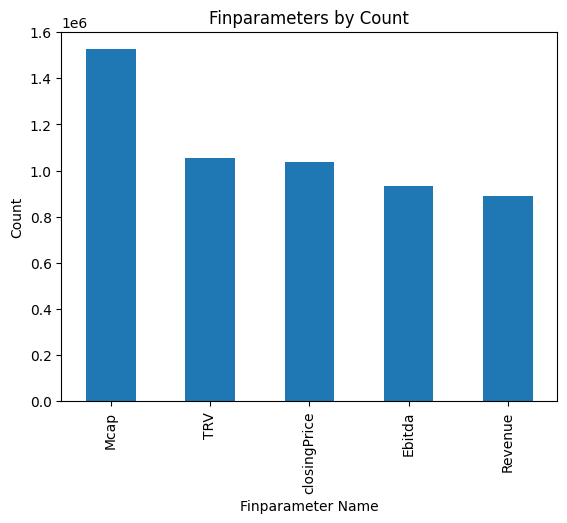

In [20]:
stocks_finpara = stocks["finparametername"].value_counts()
stocks_finpara.plot(kind='bar')
plt.title(f'Finparameters by Count')
plt.xlabel('Finparameter Name')
plt.ylabel('Count')

In [8]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5444907 entries, 0 to 706323
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   country_name          object        
 1   industry_name         object        
 2   economic_sector_name  object        
 3   company_name          object        
 4   finparametername      object        
 5   endtime               datetime64[ns]
 6   finval                float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 332.3+ MB


In [10]:
stocks.drop_duplicates(subset='company_name', keep="last")

,country_name,industry_name,economic_sector_name,company_name,finparametername,endtime,finval
744,Sweden,Oil Related Services and Equipment,Energy,Igrene AB (publ),Mcap,2024-02-01,3.455587e+07
1594,Sweden,Oil & Gas Transportation Services,Energy,Concordia Maritime AB,Mcap,2024-02-01,2.989297e+07
2336,Sweden,Renewable Energy Equipment & Services,Energy,Metacon AB (publ),Mcap,2024-02-01,2.621121e+07
3004,Sweden,Renewable Energy Equipment & Services,Energy,Midsummer AB,Mcap,2024-02-01,1.730086e+07
3882,Sweden,Renewable Energy Equipment & Services,Energy,Parans Solar Lighting AB (publ),Mcap,2024-02-01,4.401949e+05
...,...,...,...,...,...,...,...
703679,Sweden,Consumer Goods Conglomerates,Consumer Non-Cyclicals,Volati AB,Mcap,2024-02-01,5.674241e+09
704433,Sweden,Auto & Truck Manufacturers,Consumer Cyclicals,Volvo Car AB,Mcap,2024-02-01,2.285136e+09
705187,Sweden,Software,Technology,W5 Solutions AB (publ),Mcap,2024-02-01,1.302359e+09
705817,Sweden,Investment Holding Companies,Financials,Yubico AB,Mcap,2024-02-01,1.491179e+09


In [13]:
company_dedup_columns = ['country_name', 'industry_name', 'economic_sector_name', 'company_name']
stocks=stocks.drop_duplicates(subset=company_dedup_columns)
stocks['country_name'].value_counts()

country_name
Sweden    981
Name: count, dtype: int64

In [84]:
stocks[["company_name", "industry_name"]].drop_duplicates(subset='company_name', keep="last")["industry_name"].value_counts()

industry_name
Software                                        85
Biotechnology & Medical Research                71
Real Estate Rental, Development & Operations    69
Advanced Medical Equipment & Technology         46
IT Services & Consulting                        39
                                                ..
Commercial Printing Services                     1
Forest & Wood Products                           1
Paper Packaging                                  1
Non-Gold Precious Metals & Minerals              1
Tobacco                                          1
Name: count, Length: 111, dtype: int64

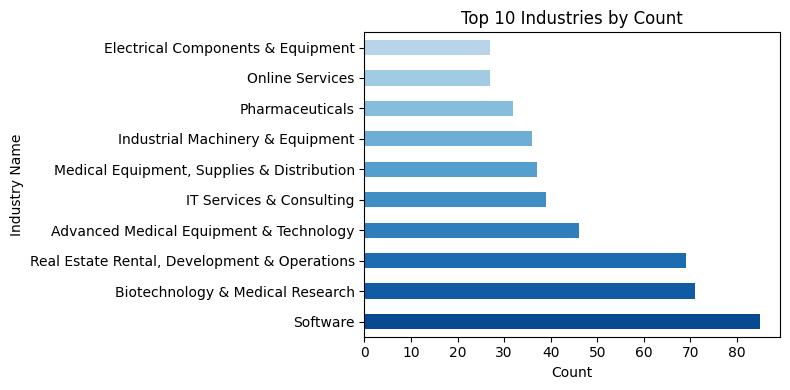


Counts for top industries:
Software: 85
Biotechnology & Medical Research: 71
Real Estate Rental, Development & Operations: 69
Advanced Medical Equipment & Technology: 46
IT Services & Consulting: 39
Medical Equipment, Supplies & Distribution: 37
Industrial Machinery & Equipment: 36
Pharmaceuticals: 32
Online Services: 27
Electrical Components & Equipment: 27


In [85]:
industry_counts = stocks[["company_name", "industry_name"]].drop_duplicates(subset='company_name', keep="last")["industry_name"].value_counts()
n_industries = 10
plt.figure(figsize=(8, 4))
colors = plt.cm.Blues(np.linspace(0.9, 0.3, n_industries))
industry_counts.head(n_industries).plot(kind='barh', color=colors)
plt.title(f'Top {n_industries} Industries by Count')
plt.xlabel('Count')
plt.ylabel('Industry Name')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()
print("\nCounts for top industries:")
for industry, count in industry_counts.head(n_industries).items():
    print(f"{industry}: {count:,}")

In [7]:
stocks["economic_sector_name"].value_counts()

economic_sector_name
Technology                         1284810
Healthcare                         1089347
Industrials                         937244
Consumer Cyclicals                  646259
Real Estate                         415081
Financials                          377118
Basic Materials                     250085
Consumer Non-Cyclicals              239284
Energy                              139266
Utilities                            40078
Academic & Educational Services      26335
Name: count, dtype: int64

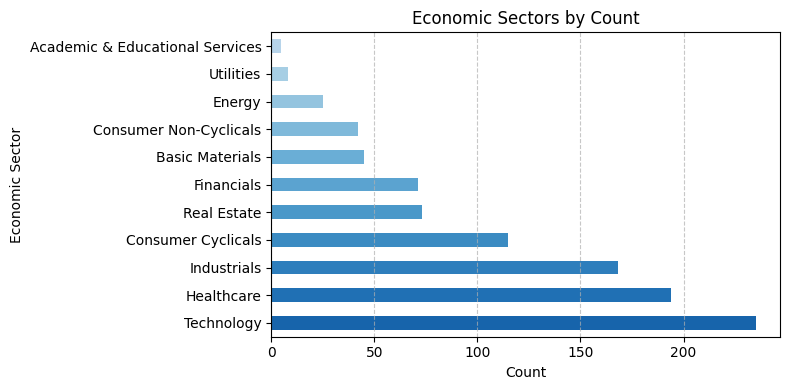


Counts for sectors:
Technology: 235
Healthcare: 194
Industrials: 168
Consumer Cyclicals: 115
Real Estate: 73
Financials: 71
Basic Materials: 45
Consumer Non-Cyclicals: 42
Energy: 25
Utilities: 8
Academic & Educational Services: 5


In [86]:
sector_counts = stocks[["company_name", "economic_sector_name"]].drop_duplicates(subset='company_name', keep="last")["economic_sector_name"].value_counts()
plt.figure(figsize=(8, 4))
colors = plt.cm.Blues(np.linspace(0.8, 0.3, len(sector_counts)))
sector_counts.plot(kind='barh', color = colors)
plt.title('Economic Sectors by Count')
plt.xlabel('Count')
plt.ylabel('Economic Sector')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("\nCounts for sectors:")
for sector, count in sector_counts.items():
    print(f"{sector}: {count:,}")

In [79]:
stocks["country_name"].value_counts()
stocks["company_name"].value_counts()

company_name
Mentice AB                           5926
Kinnevik AB                          5926
Skogsfond Baltikum AB (publ)         5926
Rentunder Holding AB                 5926
Dedicare AB (publ)                   5926
                                     ... 
ANTCO. Investment Group AB (publ)    2325
Mindark Pe publ AB                   2196
Upgrade Invest Nordic AB (publ)      2140
Observit AB (publ)                   1750
SIBEK AB (publ)                      1257
Name: count, Length: 981, dtype: int64

In [37]:
stocks_sorted = stocks.sort_values(by=['endtime'], ascending=False)
stocks_sorted

,country_name,industry_name,economic_sector_name,company_name,finparametername,endtime,finval
262686,Sweden,Communications & Networking,Technology,Clavister Holding AB,TRV,2024-08-07,0.000000e+00
66554,Sweden,Industrial Machinery & Equipment,Industrials,Trelleborg AB,closingPrice,2024-08-07,3.580660e+01
50574,Sweden,Construction & Engineering,Industrials,Instalco AB,Ebitda,2024-08-07,1.416509e+08
422447,Sweden,Online Services,Technology,Hemnet Group AB (publ),closingPrice,2024-08-07,3.565399e+01
422446,Sweden,Online Services,Technology,Hemnet Group AB (publ),Revenue,2024-08-07,9.980133e+07
...,...,...,...,...,...,...,...
31453,Sweden,Electrical Components & Equipment,Industrials,Ecoclime Group AB,closingPrice,2021-08-31,2.024653e+00
31454,Sweden,Electrical Components & Equipment,Industrials,Ecoclime Group AB,Ebitda,2021-08-31,1.598822e+06
31455,Sweden,Electrical Components & Equipment,Industrials,Ecoclime Group AB,Revenue,2021-08-31,1.700601e+07
31456,Sweden,Electrical Components & Equipment,Industrials,Ecoclime Group AB,Mcap,2021-08-31,8.149111e+07


In [38]:
closing_price_stocks = stocks_sorted[["company_name", "finparametername", "endtime", "finval"]].loc[stocks_sorted["finparametername"] == "closingPrice"]
closing_price_stocks

,company_name,finparametername,endtime,finval
66554,Trelleborg AB,closingPrice,2024-08-07,35.806602
422447,Hemnet Group AB (publ),closingPrice,2024-08-07,35.653990
364127,Trainimal AB,closingPrice,2024-08-07,0.047405
81646,Duroc AB,closingPrice,2024-08-07,1.639671
146358,TF Bank AB,closingPrice,2024-08-07,22.414895
...,...,...,...,...
382497,Idun Industrier AB (publ),closingPrice,2021-08-31,37.107042
199087,Alteco Medical AB,closingPrice,2021-08-31,0.115728
337842,Trainimal AB,closingPrice,2021-08-31,2.006099
31453,Ecoclime Group AB,closingPrice,2021-08-31,2.024653


<Figure size 800x400 with 0 Axes>

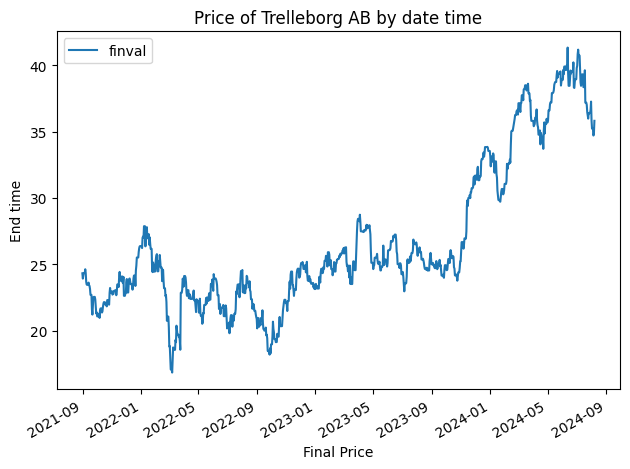

In [40]:
plt.figure(figsize=(8, 4))
Trelleborg_AB_price = closing_price_stocks.loc[closing_price_stocks["company_name"] == "Trelleborg AB"][["endtime", "finval"]]
Trelleborg_AB_price.plot(x="endtime")
plt.title('Price of Trelleborg AB by date time')
plt.xlabel('Final Price')
plt.ylabel('End time')
plt.tight_layout()
plt.show()

/var/folders/8k/g8hlzc013fnglnjvg4t6jv9c0000gn/T/ipykernel_9354/1319588207.py:22: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_shares = basket_df.groupby('basket_name').apply(get_top_share_and_company)


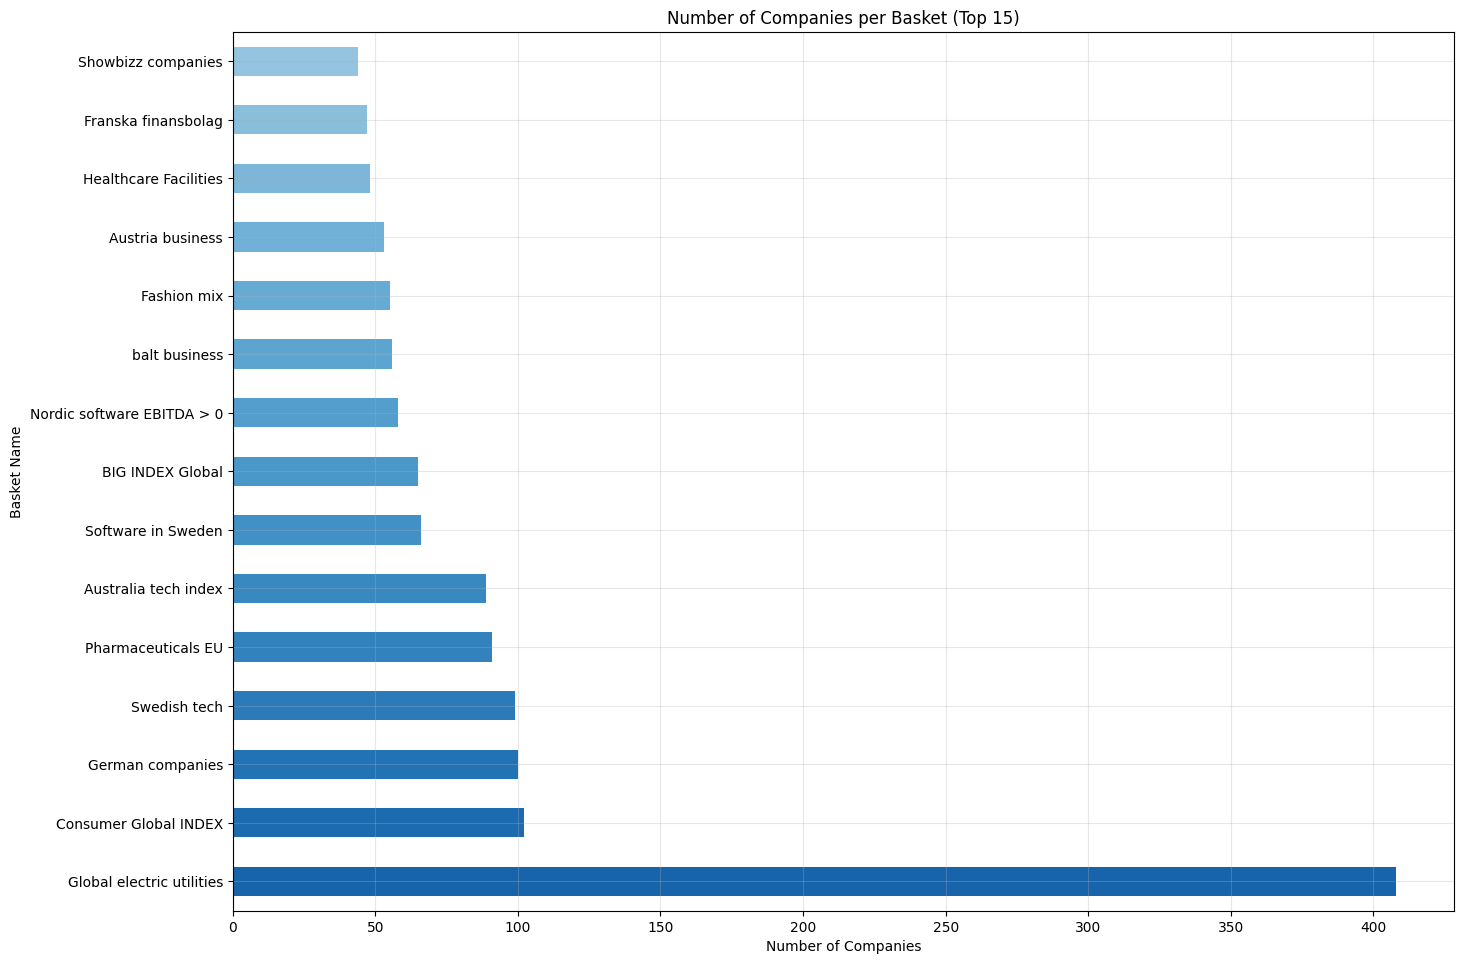

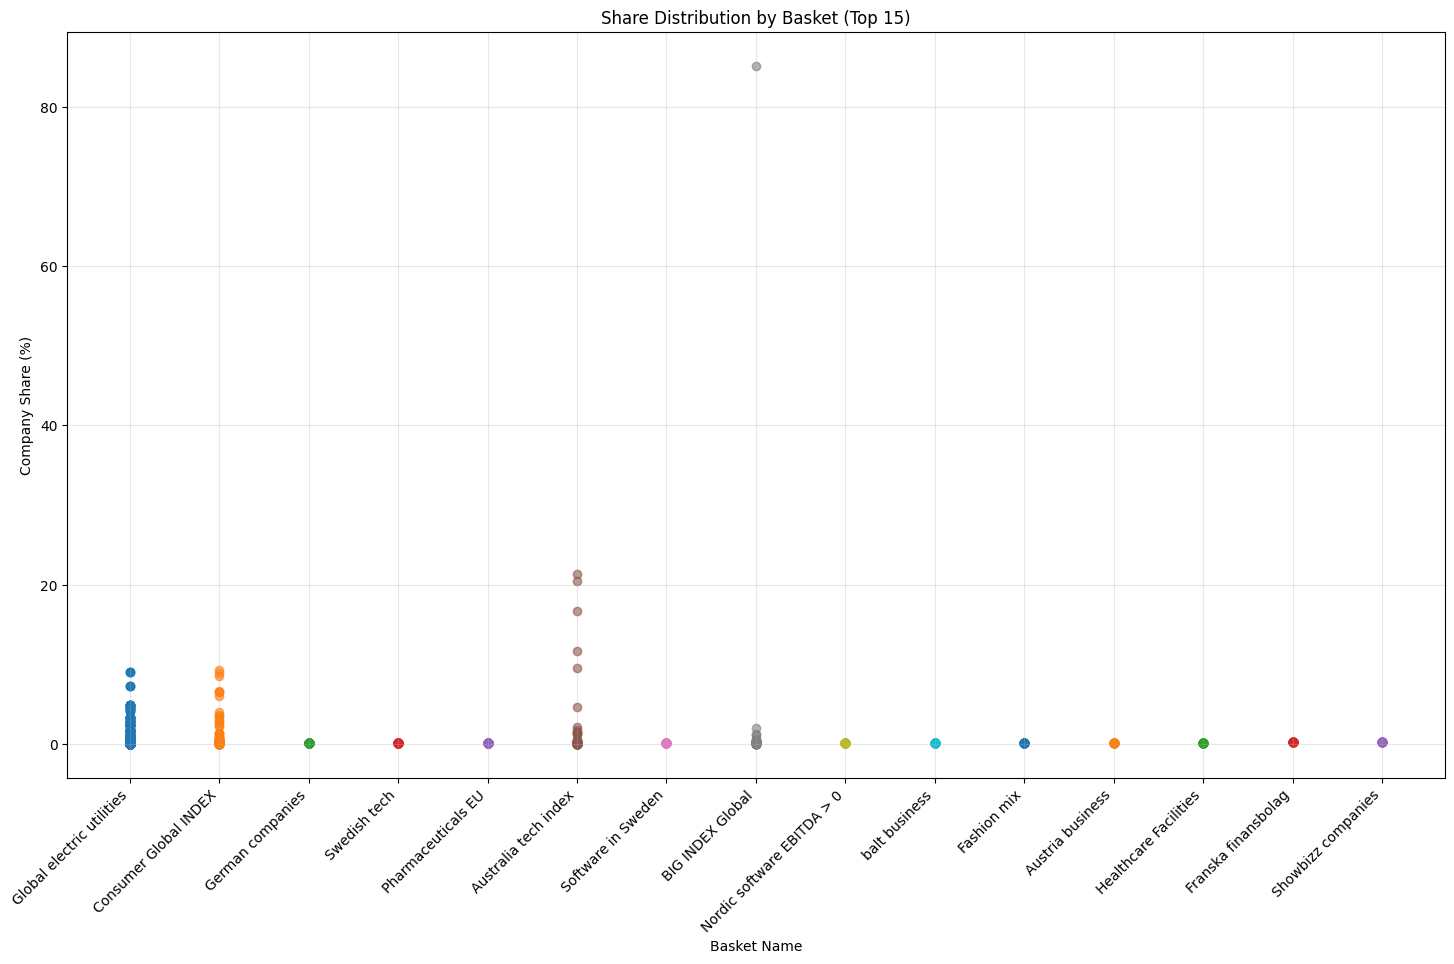


Basket Analysis Report

1. Top 15 Largest Baskets (by number of companies)
--------------------------------------------------

Basket: Global electric utilities
Number of companies: 408
Share range: 0.00% to 9.06%
Average share: 0.94%
Largest holding: Nextera Energy Inc (9.06%)

Basket: Consumer Global INDEX
Number of companies: 102
Share range: 0.00% to 9.36%
Average share: 0.98%
Largest holding: Ferrari NV (9.36%)

Basket: German companies
Number of companies: 100
Share range: 0.10% to 0.10%
Average share: 0.10%
Largest holding: 2G Energy AG (0.10%)

Basket: Swedish tech
Number of companies: 99
Share range: 0.10% to 0.10%
Average share: 0.10%
Largest holding: 4C Group AB (0.10%)

Basket: Pharmaceuticals EU
Number of companies: 91
Share range: 0.11% to 0.11%
Average share: 0.11%
Largest holding: 1nkemia IUCT Group SA (0.11%)

Basket: Australia tech index
Number of companies: 89
Share range: 0.00% to 21.38%
Average share: 1.12%
Largest holding: Xero Ltd (21.38%)

Basket: Software in S

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def analyze_baskets(basket_df, top_n=15):
    # 1. Number of companies per basket
    companies_per_basket = basket_df.groupby('basket_name')['company_name'].count().sort_values(ascending=False)
    
    # 2. Share distribution analysis
    share_stats = basket_df.groupby('basket_name').agg({
        'company_share': ['count', 'min', 'max', 'mean', 'std']
    }).sort_values(('company_share', 'count'), ascending=False)
    
    # 3. Concentration analysis
    def get_top_share_and_company(group):
        max_row = group.nlargest(1, 'company_share').iloc[0]
        return pd.Series({
            'top_share': max_row['company_share'],
            'top_company': max_row['company_name']
        })
    
    top_shares = basket_df.groupby('basket_name').apply(get_top_share_and_company)
    
    # Increase figure size and adjust font sizes
    plt.figure(figsize=(15, 10))
    plt.rcParams.update({'font.size': 10})
    
    colors = plt.cm.Blues(np.linspace(0.8, 0.4, top_n))
    companies_per_basket.head(top_n).plot(kind='barh', color=colors)
    plt.title(f'Number of Companies per Basket (Top {top_n})', fontsize=12)
    plt.xlabel('Number of Companies', fontsize=10)
    plt.ylabel('Basket Name', fontsize=10)
    plt.grid(True, alpha=0.3)
    plt.tight_layout(pad=2.0)
    plt.show()
    
    # Share distribution plot
    plt.figure(figsize=(15, 10))
    top_baskets = companies_per_basket.head(top_n).index
    
    for basket in top_baskets:
        shares = basket_df[basket_df['basket_name'] == basket]['company_share']
        plt.scatter([basket] * len(shares), shares, alpha=0.6)
    
    plt.title(f'Share Distribution by Basket (Top {top_n})', fontsize=12)
    plt.xlabel('Basket Name', fontsize=10)
    plt.ylabel('Company Share (%)', fontsize=10)
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, alpha=0.3)
    plt.tight_layout(pad=2.0)
    plt.show()
    
    # Print analysis
    print("\nBasket Analysis Report")
    print("=" * 50)
    
    print(f"\n1. Top {top_n} Largest Baskets (by number of companies)")
    print("-" * 50)
    for basket in companies_per_basket.head(top_n).index:
        n_companies = companies_per_basket[basket]
        stats = share_stats.loc[basket]
        top_share_info = top_shares.loc[basket]
        
        print(f"\nBasket: {basket}")
        print(f"Number of companies: {n_companies}")
        print(f"Share range: {stats['company_share']['min']:.2f}% to {stats['company_share']['max']:.2f}%")
        print(f"Average share: {stats['company_share']['mean']:.2f}%")
        print(f"Largest holding: {top_share_info['top_company']} ({top_share_info['top_share']:.2f}%)")
    
    print("\nOverall Statistics:")
    print("-" * 50)
    print(f"Total number of baskets: {len(companies_per_basket)}")
    print(f"Average companies per basket: {companies_per_basket.mean():.2f}")
    print(f"Median companies per basket: {companies_per_basket.median():.2f}")
    print(f"Range: {companies_per_basket.min()}-{companies_per_basket.max()} companies")
    
    # Add share distribution summary
    print("\nShare Distribution (min to max):")
    print("-" * 50)
    all_shares = basket_df['company_share'].sort_values()
    print(f"Minimum share: {all_shares.min():.2f}%")
    print(f"5th percentile: {all_shares.quantile(0.05):.2f}%")
    print(f"25th percentile: {all_shares.quantile(0.25):.2f}%")
    print(f"Median share: {all_shares.median():.2f}%")
    print(f"75th percentile: {all_shares.quantile(0.75):.2f}%")
    print(f"95th percentile: {all_shares.quantile(0.95):.2f}%")
    print(f"Maximum share: {all_shares.max():.2f}%")

# Run the analysis
analyze_baskets(basket_df)

In [87]:
# Group by basket_name and sum the shares
basket_sums = basket_df.groupby('basket_name')['company_share'].sum()

# Check which baskets don't sum to approximately 100
# Using a small tolerance (e.g., 0.01) to account for floating point rounding
tolerance = 0.01
incorrect_sums = basket_sums[abs(basket_sums - 100) > tolerance]

print("Baskets with share sums not equal to 100%:")
print("-" * 50)
if len(incorrect_sums) > 0:
    for basket, total in incorrect_sums.items():
        print(f"Basket: {basket}")
        print(f"Total share: {total:.2f}%")
        print(f"Difference from 100%: {(total - 100):.2f}%")
        
        # Show the individual shares for these baskets
        shares = basket_df[basket_df['basket_name'] == basket][['company_name', 'company_share']]
        print("Individual shares:")
        print(shares)
        print("-" * 50)
else:
    print("All baskets sum to 100% (within tolerance of 0.01%)")

print("\nSummary:")
print(f"Total number of baskets: {len(basket_sums)}")
print(f"Number of baskets not summing to 100%: {len(incorrect_sums)}")
print("\nShare sum statistics:")
print(basket_sums.describe())

Baskets with share sums not equal to 100%:
--------------------------------------------------
Basket: Aluminium 
Total share: 10.00%
Difference from 100%: -90.00%
Individual shares:
        company_name  company_share
11  AGES Industri AB       3.333333
12        Alcomet AD       3.333333
13  ProfilGruppen AB       3.333333
--------------------------------------------------
Basket: Australian Health
Total share: 200.00%
Difference from 100%: 100.00%
Individual shares:
                   company_name  company_share
29        Actinogen Medical Ltd       0.298882
30        Actinogen Medical Ltd       0.298882
31      Amplia Therapeutics Ltd       0.024236
32      Amplia Therapeutics Ltd       0.024236
33                   Ansell Ltd      13.951062
34                   Ansell Ltd      13.951062
35        Benitec Biopharma Inc       0.257588
36        Benitec Biopharma Inc       0.257588
37  Botanix Pharmaceuticals Ltd       1.994687
38  Botanix Pharmaceuticals Ltd       1.994687
39        